In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import json
%matplotlib widget

Colors = json.load(open('../config.json'))

In [17]:
# Importing Data

data1 = np.loadtxt("data/data1.txt",delimiter=',',dtype='float') # Sr/length of the section/start time/end time
data2 = np.loadtxt("data/data2.txt",delimiter=',',dtype='float') # Sr/length of the section/start time/end time
data3 = np.loadtxt("data/data3.txt",delimiter=',',dtype='float') # MagnField/distance(m)

In [18]:
def divide_chunks(l,n):
    for i in range(0,len(l),n):
        yield l[i:i+n]

n = 3
nData1 = list(divide_chunks(data1,n))

print(nData1)

[array([[ 1.   , 19.7  ,  1.392,  1.492],
       [ 2.   , 20.3  ,  1.492,  1.564],
       [ 3.   , 19.7  ,  1.564,  1.62 ]]), array([[ 1.   , 19.7  ,  1.644,  1.74 ],
       [ 2.   , 20.3  ,  1.74 ,  1.812],
       [ 3.   , 19.7  ,  1.812,  1.866]]), array([[ 1.   , 19.7  ,  1.978,  2.076],
       [ 2.   , 20.3  ,  2.076,  2.148],
       [ 3.   , 19.7  ,  2.148,  2.206]])]


In [19]:
# Calculating Velocity

time11 = data1[:,2]
time12 = data1[:,3]
dist1 = data1[:,1] / 100

timeInst = []
for i in range(len(time12)):
    timeInst.append(time12[i]-time11[i])

print(timeInst)

velc = []
for i in range(len(timeInst)):
    velc.append(dist1[i]/timeInst[i])
print(velc)

[0.10000000000000009, 0.07200000000000006, 0.05600000000000005, 0.09600000000000009, 0.07200000000000006, 0.05400000000000005, 0.09800000000000009, 0.07200000000000006, 0.05799999999999983]
[1.969999999999998, 2.819444444444442, 3.5178571428571392, 2.0520833333333313, 2.819444444444442, 3.6481481481481444, 2.010204081632651, 2.819444444444442, 3.396551724137941]


In [25]:
# Calculating Acceleration of gravity

grav = []
for i in range(0,len(timeInst)):
    grav.append((velc[i]-velc[i-1])/timeInst[i-1])

print(grav)

g = 8.993 # avg of all the values

[-24.595719381688742, 8.494444444444433, 9.700176366843008, -26.17453231292512, 7.993344907407396, 11.509773662551412, -30.33229752806466, 8.257554722569287, 8.015378884631922]


In [23]:
# Calculating Terminal Velocity

time21 = data2[:,2]
time22 = data2[:,3]
dist2 = data2[:,1]

timeInst2 = []
for i in range(len(time22)):
    timeInst2.append(time22[i]-time21[i])

termVelc = []
for i in range(len(timeInst2)):
    termVelc.append(dist2[i]/timeInst2[i])

print(termVelc)

velcT = 0
for i in termVelc:
    velcT += i
velcT = velcT/len(termVelc)

print(velcT)



[76.953125, 80.55555555555556, 69.36619718309863, 81.40495867768595, 82.52032520325204, 84.91379310344836, 76.35658914728681, 80.55555555555563, 78.8, 76.35658914728681, 72.49999999999994, 67.00680272108852, 82.77310924369763, 83.88429752066116, 80.08130081300799, 80.73770491803286, 78.68217054263566, 72.96296296296308, 75.76923076923083, 79.92125984251955, 77.55905511811036, 76.95312499999993, 77.48091603053449, 60.42944785276064, 77.55905511811036, 81.2, 76.95312499999993, 76.95312499999993, 71.98581560283688, 67.00680272108852]
76.87273317834827


[296296.29629629635, 124999.99999999999, 37037.037037037044, 15624.999999999998, 7999.999999999998, 4629.6296296296305, 2915.451895043731, 1953.1249999999998]
Slope: 179.74198222627217 Intercept: 6705.12744390662


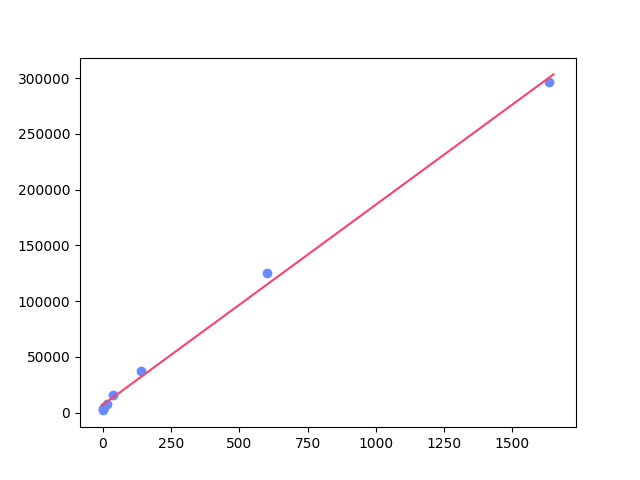

89.87099111313609


In [30]:
# Calculating Magnetic Moment and plotting the graph

magn = data3[:,0]
dist3 = data3[:,1]

newDist3 = []
for i in dist3:
    i = i**3
    i = 1/i
    newDist3.append(i)
print(newDist3)


x = np.arange(0,1650,0.1)
aFit, bFit = np.polyfit(magn,newDist3,1)

print("Slope:",aFit,"Intercept:",bFit)

plt.clf()
plt.scatter(magn,newDist3,color=Colors.get('Blue'))
plt.plot(x,aFit*x+bFit,color=Colors.get('Red'))
plt.show()

magMoment = aFit/2
print(magMoment)

In [29]:

def kVal(k,t,m,a,l):
    return (k*(64*(a**4)))/((a/3)*(1-(1/(l**3)))*((45*((np.pi)**2)*t*(m**2))))
 
# Calculating value of k

mass = 1 # Mass of the object in kg # placeholder

k = mass*g/velcT

m = magMoment
a = 1 # Inner Radius # placeholder
b = 2 # Outer Radius # placeholder
t = b - a
l = b/a

print(kVal(k,t,m,a,l))

7.156062501045477e-06


In [ ]:
# Calculating Current

def di(B,v,s,A):
    return B*v*s*A

dA = 2*np.pi*a*t
B = 1 # placeholder

current = di(magn,velcT,dA,1)